## Data Validation
The dataset contains 947 rows and 8 columns with missing values before cleaning. I have made several changes and validated all the columns against the criteria in the dataset table:

- recipe: 947 numeric unique identifiers as description without missing values.
- calories: Numeric values with 52 missing values, so I imputed the missing values with their mean.
- carbohydrate: Numeric values with 52 missing values, so I imputed the missing values with their mean.
- sugar: Numeric values with 52 missing values, so I imputed the missing values with their mean.
- protein: Numeric values with 52 missing values, so I imputed the missing values with their mean.
- category: 11 unique category values without missing values, there was an extra category "Chicken Breast", so I combined it with the "Chicken" category
- servings: 6 unique character values without missing values, there was two extra values "4 as a snack" and "6 as a snack", so I combined them with 4 and 6 respectively then converted the column's type to numeric.
- high_traffic: 1 unique character value "High" with the rest being null values, so I replaced the null values with "Low".

After the data validation and cleaning, the dataset contains 947 rows and 8 columns.

In [54]:
# Importing libraries used in the data validation
import pandas as pd

In [55]:
# Reading the dataset
df = pd.read_csv('recipe_site_traffic_2212.csv')
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [56]:
# Checking the shape of the dataset
df.shape

(947, 8)

In [57]:
# Checking the data for duplicates
df.duplicated().sum()

0

In [58]:
# Checking the data for null values
df.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [59]:
# Imputing null values with mean values
df.calories.fillna(df.groupby(["category","servings"]).calories.transform('mean'), inplace=True)
df.carbohydrate.fillna(df.groupby(["category","servings"]).carbohydrate.transform('mean'), inplace=True)
df.protein.fillna(df.groupby(["category","servings"]).protein.transform('mean'), inplace=True)
df.sugar.fillna(df.groupby(["category","servings"]).sugar.transform('mean'), inplace=True)

df.isna().sum()

recipe            0
calories          0
carbohydrate      0
sugar             0
protein           0
category          0
servings          0
high_traffic    373
dtype: int64

In [60]:
# Replacing null values in the high_traffic column with 'Low'
df.high_traffic.fillna('Low', inplace=True)
df.isna().sum()

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

In [61]:
# Checking for unique values in the dataset
df.nunique()

recipe          947
calories        917
carbohydrate    861
sugar           692
protein         797
category         11
servings          6
high_traffic      2
dtype: int64

In [62]:
# Checking recipies categories and their counts
df.category.value_counts()

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64

In [63]:
# Combining Chicken Breast and Chicken categories
df.category.replace('Chicken Breast', 'Chicken', inplace=True)

df.category.value_counts()

Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Vegetable         83
Dessert           83
Meat              79
One Dish Meal     71
Name: category, dtype: int64

In [64]:
# Checking number of servings and their counts
df.servings.value_counts()

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

In [65]:
# Replacing '4 as a snack' and '6 as a snack' with '4' and '6' respectively
df.servings.replace({'4 as a snack': '4', '6 as a snack': '6'}, inplace=True)

df.servings.value_counts()

4    391
6    198
2    183
1    175
Name: servings, dtype: int64

In [66]:
# Checking for class imbalance
df.high_traffic.value_counts()

High    574
Low     373
Name: high_traffic, dtype: int64

In [67]:
# Checking for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      947 non-null    float64
 2   carbohydrate  947 non-null    float64
 3   sugar         947 non-null    float64
 4   protein       947 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  947 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [68]:
# Converting the servings column to numeric
df.servings = df.servings.astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      947 non-null    float64
 2   carbohydrate  947 non-null    float64
 3   sugar         947 non-null    float64
 4   protein       947 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    int64  
 7   high_traffic  947 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 59.3+ KB


In [69]:
# Generate descriptive statistics of the numeric columns
df.describe()

,recipe,calories,carbohydrate,sugar,protein,servings
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,474.000000,439.210748,35.144413,9.060182,24.567001,3.477297
std,273.519652,442.354374,42.908525,14.448921,35.759721,1.732741
min,1.000000,0.140000,0.030000,0.010000,0.000000,1.000000
25%,237.500000,114.410000,9.135000,1.795000,3.465000,2.000000
50%,474.000000,306.900000,22.350000,4.720000,11.200000,4.000000
75%,710.500000,598.995000,44.825000,9.565000,32.275000,4.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000


In [70]:
# Previewing the dataset after cleaning
df.head(10)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,764.641333,20.072,7.013333,66.528,Pork,6,High
1,2,35.480000,38.560,0.660000,0.920,Potato,4,High
2,3,914.280000,42.680,3.090000,2.880,Breakfast,1,Low
3,4,97.030000,30.560,38.630000,0.020,Beverages,4,High
4,5,27.050000,1.850,0.800000,0.530,Beverages,4,Low
5,6,691.150000,3.460,1.650000,53.930,One Dish Meal,2,High
6,7,183.940000,47.950,9.750000,46.710,Chicken,4,Low
7,8,299.140000,3.170,0.400000,32.400,Lunch/Snacks,4,Low
8,9,538.520000,3.780,3.370000,3.790,Pork,6,High
9,10,248.280000,48.540,3.990000,113.850,Chicken,2,Low


## Exploratory Analysis
After investigating the target variable and the features of the dataset, as well as the relationship between the target variable and features, I have decided not to make any changes to the variables.

### Target Variable - high_traffic
Since we need to predict the price, the price variable would be our target variable.

In [71]:
# Importing libraries used in the exploratory analysis
import matplotlib.pyplot as plt
import seaborn as sns

From the Distribution of High Traffic plot we conclude that their is some slight imbalance between "High" and "Low" traffic recipies but it shouldn't be significant.

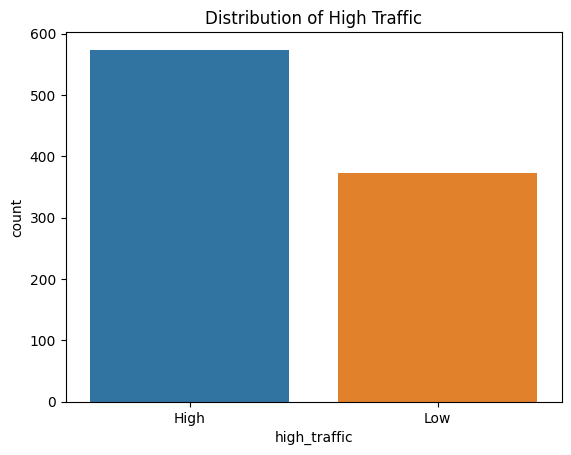

In [72]:
# Plotting the distribution of the High Traffic column
sns.countplot(data=df, x="high_traffic")
plt.title('Distribution of High Traffic')

plt.show()

### Numeric Variables: calories, carbohydrate, sugar, protein

From the heatmap below, we can conclude that there is a weak correlation between variables since the values are close to 0.

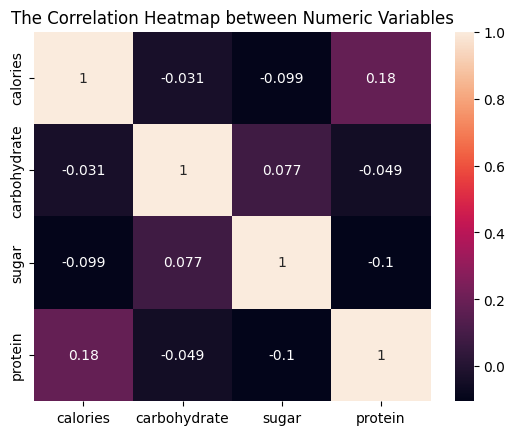

In [73]:
# Plotting a Heatmap of Numeric Variables
numeric = df[['calories', 'carbohydrate', 'sugar', 'protein']]

sns.heatmap(numeric.corr(), annot=True).set(title='The Correlation Heatmap between Numeric Variables')

plt.show()

From the four hisplots below and by comparing the distributions of these attributes between high traffic and low traffic recipes, we can conclude that users may potentialy prefer lower calorie recipies.

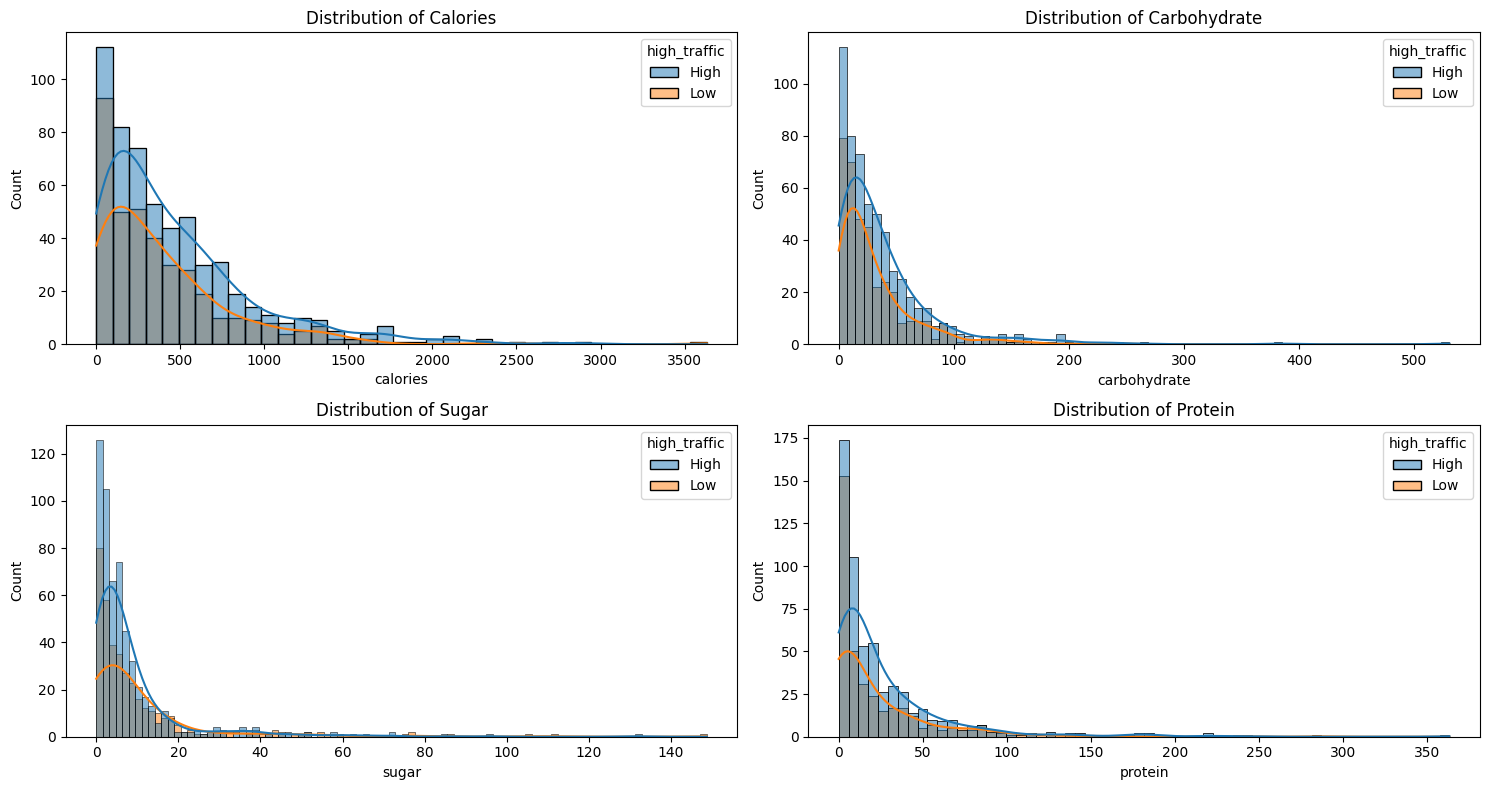

In [74]:
# Plotting the distribution of the numeric variables
plt.figure(figsize=(15, 8))

numeric = ['calories', 'carbohydrate', 'sugar', 'protein']

for i, col in enumerate(numeric, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df, x=col, kde=True, hue='high_traffic')
    plt.title(f'Distribution of {col.capitalize()}')

plt.tight_layout()
plt.show()

From the scatter plot below, it suggests that while nutritional content might influence traffic, other factors could also play a more significant role.

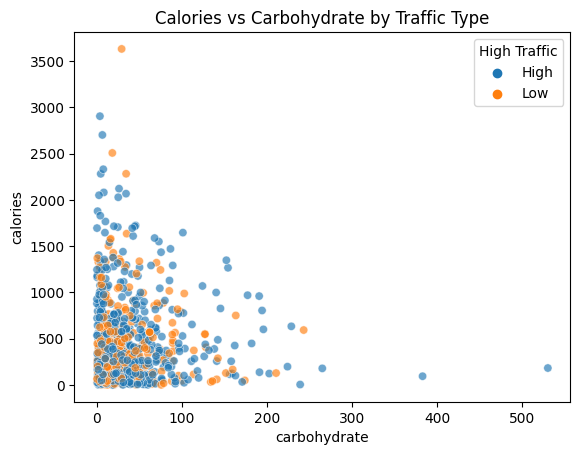

In [75]:
# Plotting the relation between Calories and Carbohydrate by traffic type
sns.scatterplot(data=df, x="carbohydrate", y="calories", hue="high_traffic", alpha=0.65)
plt.title('Calories vs Carbohydrate by Traffic Type')
plt.legend(title='High Traffic')

plt.show()

### Categorical Variables - servings, category, high_traffic

From the Distribution of Servings and Categories, we conclude that most recipies have 4 servings and is a chicken recipe.

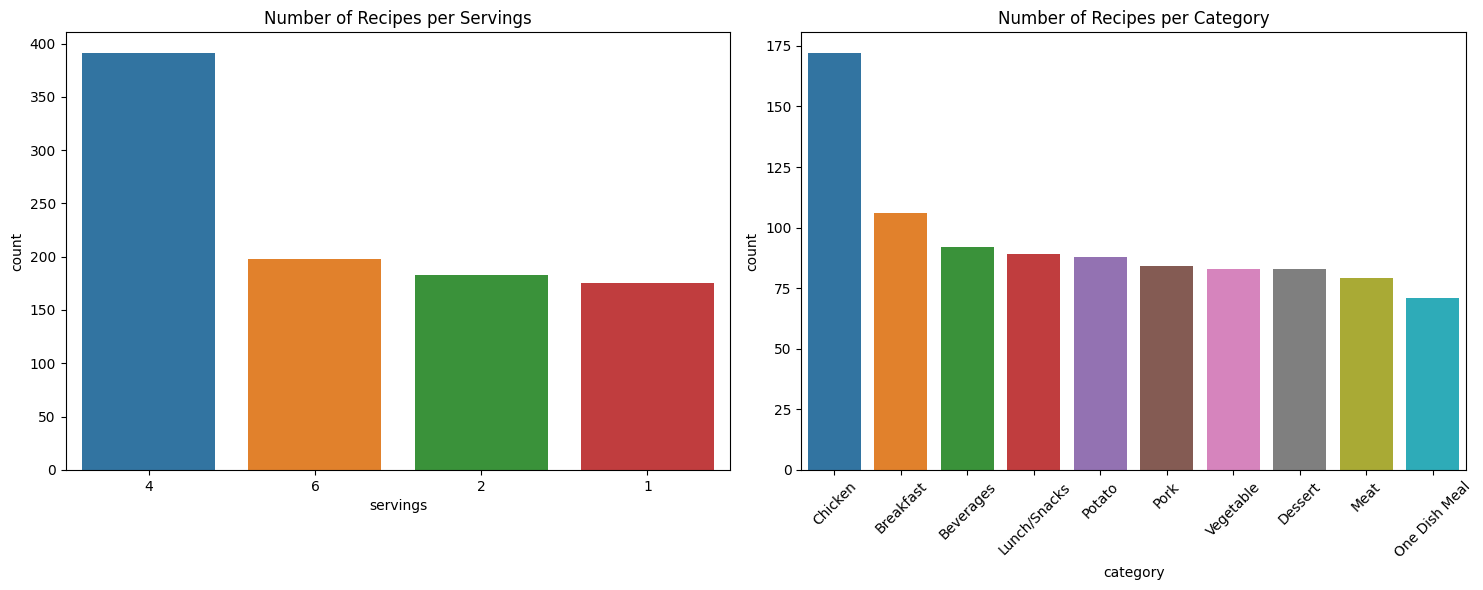

In [76]:
# Plotting the distribution of the categorical variables
plt.figure(figsize=(15, 6))

# Distribution of calories
plt.subplot(1, 2, 1)
sns.countplot(df, x="servings", order=df.servings.value_counts().index)
plt.title('Number of Recipes per Servings')

# Distribution of categories
plt.subplot(1, 2, 2)
sns.countplot(df, x="category", order=df.category.value_counts().index)
plt.title('Number of Recipes per Category')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

From the plot below, we can conclude that "Potato", "Vegetable", "Pork" have a lot higher number of high traffic then the number of low traffic, on the other side "Beverages", "Chicken" have more low traffic number than **high.**

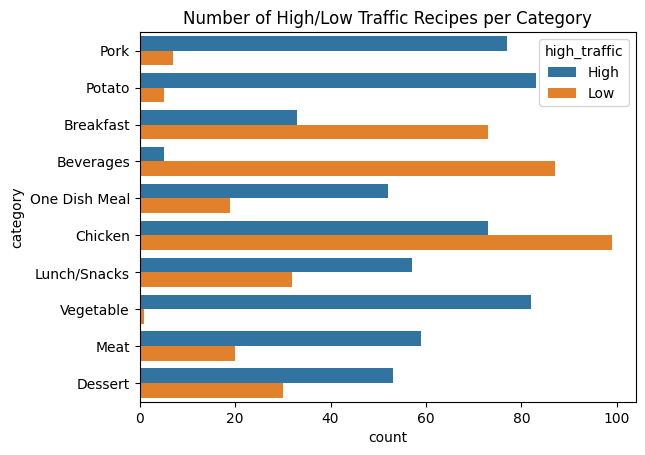

In [77]:
# Plotting the distribution of recipes categories by traffic type
sns.countplot(df, y="category", hue="high_traffic")
plt.title('Number of High/Low Traffic Recipes per Category')

plt.show()

From the plot below, we can conclude that the amount of servings doesn't have a big influence over the traffic of a recipe.

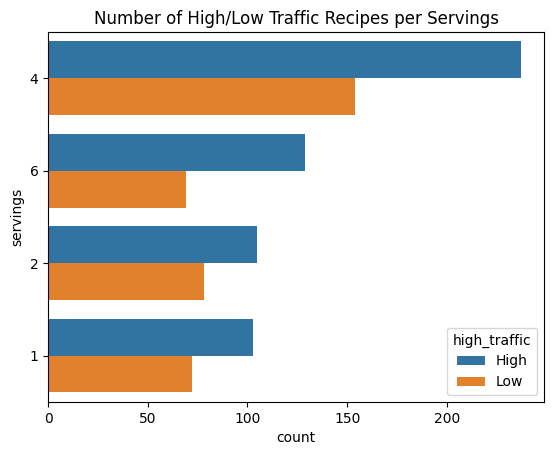

In [78]:
# Plotting the distribution of servings column by traffic type
sns.countplot(data=df, y="servings", hue="high_traffic", order=df.servings.value_counts().index)
plt.title('Number of High/Low Traffic Recipes per Servings')

plt.show()

From the boxplot below, we conclude that "Chicken" and "Meat" categories tend to have a higher median calorie count compared to other categories while "Beverages" and "Vegetable" have the lowest.


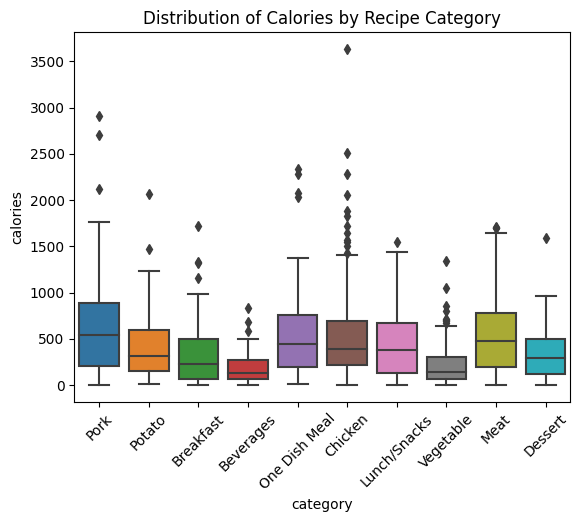

In [79]:
# Plotting the distribution of 'calories' across different 'category' values
sns.boxplot(df, x='category', y='calories')
plt.title('Distribution of Calories by Recipe Category')
plt.xticks(rotation=45)

plt.show()

## Model Development and Evaluation
Predicting traffic levels is a classification problem in machine learning. I am opting for the Logistic Regression model because we can observe a strong to moderate relationship between certain features and the target variable, which in this case is whether traffic is "high" or "low." As a comparative model, I am selecting the Support Vector Classifier model for its ability to handle complex decision boundaries may be advantageous in capturing intricate relationships within our data.

For the evaluation, I am choosing Accuracy, Precision, and Recall to evaluate the model. Accuracy measures how well the model correctly classifies instances. Precision quantifies the proportion of true positive predictions among all positive predictions, while Recall measures the proportion of true positive predictions among all actual positives.

### Prepare Data for Modelling

To enable modelling, we chose calories, carbohydrate, sugar, protein, category, servings as features and high_traffic as target variables. I also have made the following changes:

- Convert the categorical variables into numeric features
- Normalize the numeric features
- Split the data into a training set and a test set

In [107]:
# Importing libraries used in the model development and evaluation
from sklearn.metrics import classification_report, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [81]:
# Label encoding the categorical variables
labelencoder = LabelEncoder()
df["category"] = labelencoder.fit_transform(df["category"])
df["high_traffic"] = df.high_traffic.map({"High": 1, "Low": 0})

df.head(10)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,764.641333,20.072,7.013333,66.528,7,6,1
1,2,35.480000,38.560,0.660000,0.920,8,4,1
2,3,914.280000,42.680,3.090000,2.880,1,1,0
3,4,97.030000,30.560,38.630000,0.020,0,4,1
4,5,27.050000,1.850,0.800000,0.530,0,4,0
5,6,691.150000,3.460,1.650000,53.930,6,2,1
6,7,183.940000,47.950,9.750000,46.710,2,4,0
7,8,299.140000,3.170,0.400000,32.400,4,4,0
8,9,538.520000,3.780,3.370000,3.790,7,6,1
9,10,248.280000,48.540,3.990000,113.850,2,2,0


In [82]:
# Splitting data into features and target variables
X = df.drop(['recipe', 'high_traffic'], axis=1) # Features
y = df['high_traffic'] # Target

In [83]:
# Normalizing the numeric variables
cols = ['calories', 'carbohydrate', 'sugar', 'protein', 'servings']

scaler = StandardScaler()
X[cols] = scaler.fit_transform(X[cols])

In [84]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression Model

#### Training and Evaluating

In [87]:
# Finding the best parameter for Logistic Regression model
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'newton-cg', 'newton-cholesky', 'lbfgs', 'sag', 'saga']
}

lr_search = GridSearchCV(LogisticRegression(), param_grid, cv=10, scoring='accuracy')
lr_search.fit(X_train, y_train)
y_pred_lr_search = lr_search.predict(X_test) 

best_C = lr_search.best_params_['C']
best_penalty = lr_search.best_params_['penalty']
best_solver = lr_search.best_params_['solver']


lr_search_score = accuracy_score(y_test, y_pred_lr_search)
f'best params are {lr_search.best_params_} with a score of {lr_search_score}'

"best params are {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'} with a score of 0.7631578947368421"

In [47]:
# Run and evaluate the tuned Logistic Regression model
lr = LogisticRegression(C=best_C, penalty=best_penalty, solver=best_solver)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_pred_lr))

Classification report:
               precision    recall  f1-score   support

           0       0.68      0.70      0.69       107
           1       0.82      0.80      0.81       178

    accuracy                           0.76       285
   macro avg       0.75      0.75      0.75       285
weighted avg       0.76      0.76      0.76       285



#### Finding the feature importance

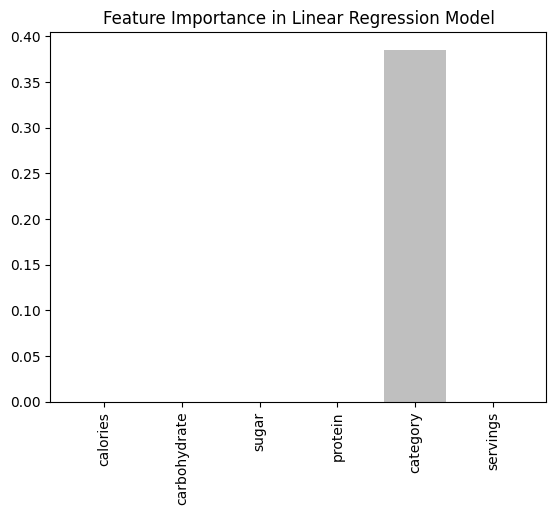

In [103]:
resultdict = {}
feature_cols = X.columns.tolist()

for i in range(len(feature_cols)):
    resultdict[feature_cols[i]] = lr.coef_[0][i]
    
plt.bar(resultdict.keys(),resultdict.values(), alpha=0.5,color='gray')
plt.xticks(rotation='vertical')
plt.title('Feature Importance in Logistic Regression Model');

### Support Vector Classifier Model

#### Training and Evaluating

In [91]:
# Finding the best parameter for Support Vector Classifier model
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

svc_search = GridSearchCV(SVC(random_state=42), param_grid, cv=10, scoring='accuracy')
svc_search.fit(X_train, y_train)
y_pred_svc_search = svc_search.predict(X_test) 

best_C = svc_search.best_params_['C']
best_kernel = svc_search.best_params_['kernel']
best_gamma = svc_search.best_params_['gamma']
best_degree = svc_search.best_params_['degree']

test_accuracy = accuracy_score(y_test, y_pred_svc_search)
f'best params are {svc_search.best_params_} with a score of {test_accuracy}'

"best params are {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'} with a score of 0.7736842105263158"

In [92]:
# Run and evaluate Support Vector Classifier model
svc = SVC(C=best_C, kernel=best_kernel, gamma=best_gamma, degree=best_degree, random_state=42)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_pred_svc))

Classification report:
               precision    recall  f1-score   support

           0       0.72      0.73      0.72        77
           1       0.81      0.81      0.81       113

    accuracy                           0.77       190
   macro avg       0.77      0.77      0.77       190
weighted avg       0.77      0.77      0.77       190



#### Finding the feature importance

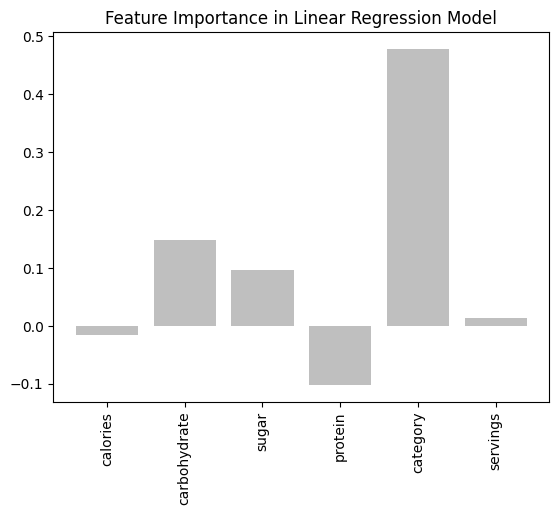

In [106]:
resultdict = {}
feature_cols = X.columns.tolist()

for i in range(len(feature_cols)):
    resultdict[feature_cols[i]] = svc.coef_[0][i]
    
plt.bar(resultdict.keys(),resultdict.values(), alpha=0.5,color='gray')
plt.xticks(rotation='vertical')
plt.title('Feature Importance in Support Vector Classifier Model');

### Results
- Accuracy: The Support Vector Classifier model has a slightly higher accuracy (0.77) compared to the Logistic Regression model (0.76). This suggests that the Support Vector Classifier model correctly predicted the class labels more often.
- Precision: Both models have good precision values, with the Support Vector Classifier model having a higher precision for low recipies but slightly less for high recipies. This indicates that overall the Support Vector Classifier model makes fewer false-positive predictions compared to the Logistic Regression model but the Logistic Regression model can predict high recipies slightly more percised.
- Recall: The Support Vector Classifier model also has a higher recall for both classes, meaning it captures a higher percentage of true positive cases. This indicates that the Support Vector Classifier model is better at identifying instances of both classes.

In summary, the Support Vector Classifier model outperforms the Logistic Regression model in terms of accuracy, precision and recall, for both classes. It is the better overall performing model for this binary classification task.
